# Overview
---
### Problem Statement
Brain disorders are difficult to diagnose.  They require imaging from different angles and are extremely important to diagnose correctly.  This makes it time-consuming to diagnose many scans. This project has the goal of developing a model to identify which brain scans are normal and which scans have malignant tumors (and which category of tumor). This would improve healthcare speed and efficiency, as well as reduce the risk of misdiagnosis if a successful model could be developed.

### What is Deep Learning?
Deep learning is a sub-area of machine learning.  It is a technique that combines multiple neural network layers to interpret and predict data that is very complex. For this project, we will use a Convolutional Neural Network (CNN), which combines these neural network layers with convolutional layers to classify images.

### Data Description
The dataset for this project contains brain MRI images categorized into four classes: "normal," "gliomal," "meningiomal," and "pituitary." Each image is 150x150 pixels. The dataset is divided into training and validation subsets to evaluate the model's performance.

---

### Setup Google Drive connection and data path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/MSDS/Deep Learning/Final/Data'

Mounted at /content/drive


### Import Libraries

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Exploratory Data Analysis (EDA)
---
### Sample Images Visualization
This shows a 3 by 3 grid of random sample images from each class to allow us to see the images. This helps verify that the images are organized correctly and belong to their respective classes as well as showing us whether there are between-class processing that must be done.

### Class Distribution
This is a bar plot showing the number of images per class. This helps to identify any major class imbalances. Big swings in the classes would influence our model heavily and might require data augmentation, weighted loss, and potentially other methods to balance the discrepancy out.

---

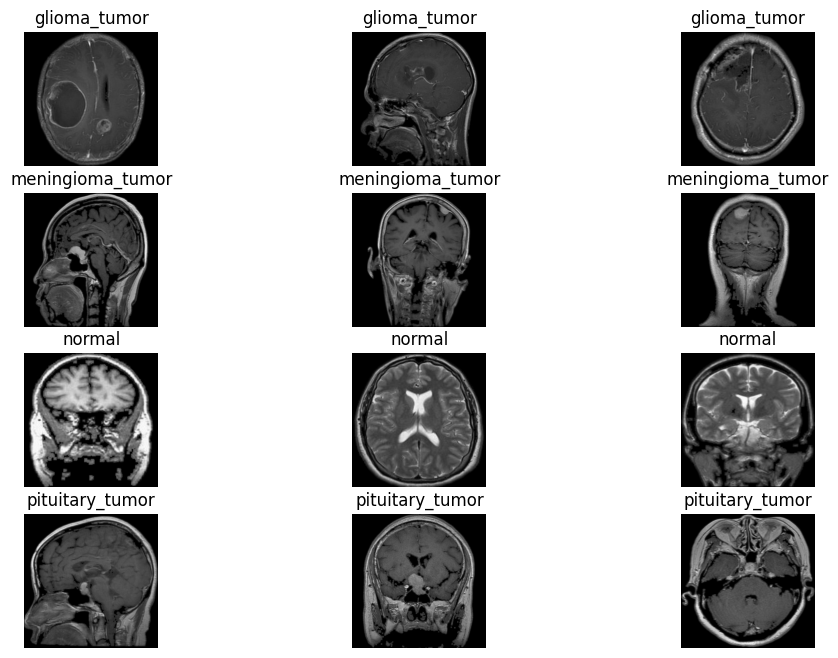

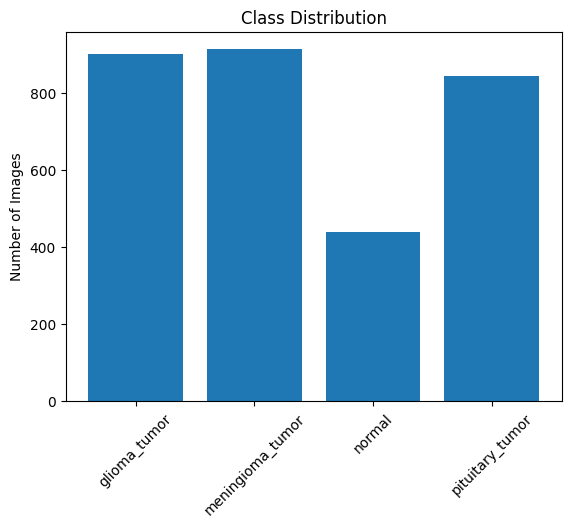

In [ ]:
# Define the classes (subdirectories) in your dataset
classes = os.listdir(data_path)

# Set the number of sample images to display for each class
num_samples_per_class = 3

# Create a grid of subplots to display images for visual inspection
plt.figure(figsize=(12, 8))
for i, class_label in enumerate(classes):
    class_path = os.path.join(data_path, class_label)
    sample_images = random.sample(os.listdir(class_path), num_samples_per_class)

    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)

        plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')

plt.show()

print('\n')

# Class Distibution Plot
class_counts = {class_label: len(os.listdir(os.path.join(data_path, class_label))) for class_label in classes}
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Model Architecture
---

### Input Layer:
Accepts images of size 150x150x3 (3 channels for RGB images).
Images are normalized to have pixel values between 0 and 1 using `ImageDataGenerator`.

### Convolutional Layer:
Conv2D layer with 32 filters of size (3x3) and ReLU activation.

### Pooling Layer:
A MaxPooling2D layer (takes maximum value in a 2x2 window).

### Flattening Layer:
Converts the 2D feature maps into a 1D feature vector to be used as input for the Dense (fully connected) layers.

### Dense Layers:
A Dense layer with a ReLU activation layer.
The output layer has neurons equal to the number of classes in the dataset (train_generator.num_classes) and uses the Softmax activation function to calculate the probabilities for each class.

### Compilation:
The model is compiled using the Adam optimizer for efficient learning. Categorical Crossentropy is used as the loss function since this is a multi-class classification problem. The model tracks accuracy as the evaluation metric.

### Training:
The model is trained for 10 epochs using the training set, with validation performance monitored during training.

---

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

Found 2479 images belonging to 4 classes.
Found 617 images belonging to 4 classes.
Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 30s 198ms/step - accuracy: 0.3706 - loss: 4.3276 - val_accuracy: 0.5964 - val_loss: 1.0269
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.7138 - loss: 0.7882 - val_accuracy: 0.6288 - val_loss: 0.8976
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.8545 - loss: 0.4345 - val_accuracy: 0.7034 - val_loss: 0.8604
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9289 - loss: 0.2438 - val_accuracy: 0.7326 - val_loss: 0.8871
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.9667 - loss: 0.1410 - val_accuracy: 0.6969 - val_loss: 0.8607
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9977 - loss: 0.0520 - val_accuracy: 0.7374 - val_loss: 0.8884
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9991 - loss: 0.0304 - val_accuracy: 0.7310 - val_loss: 0.9208
Epoch 8/10
78/

# Results
---

### Left Plot: Accuracy over Epochs
- **Blue Line (Train Accuracy):** Represents the accuracy of the model on the training dataset for each epoch.
- **Orange Line (Validation Accuracy):** Represents the accuracy of the model on the validation dataset for each epoch.

### Right Plot: Loss over Epochs
- **Blue Line (Train Loss):** Represents the loss value on the training dataset for each epoch.
- **Orange Line (Validation Loss):** Represents the loss value on the validation dataset for each epoch.

---

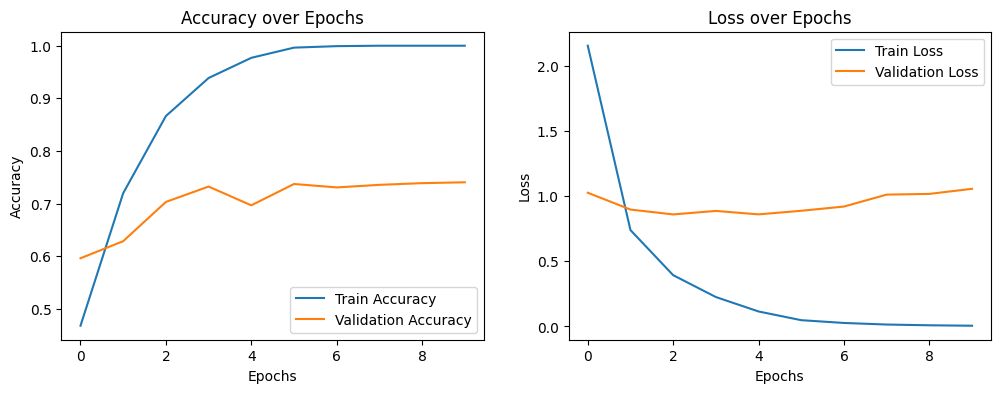

In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Early Conclusions
---

### Interpretation of the Results

1. Training Accuracy and Loss:
  - The training accuracy shows a steady increase over the epochs, eventually approaching near 1.0, indicating the model fits the training data very well.
  - The training loss decreases consistently, suggesting the model learns from the training dataset effectively.

2. Validation Accuracy and Loss:
  - Validation accuracy initially improves but starts to plateau and then fluctuates slightly after a few epochs. This could indicate the model's ability to generalize is limiting out.
  - Validation loss initially decreases but begins to rise after a few epochs, signaling **overfitting**.

3. Gap Between Training and Validation Performance:
  - A clear gap exists between training and validation accuracy, with training accuracy being significantly higher. Similarly, validation loss increases while training loss decreases.
  - This further supports the idea that there may be a presence of overfitting.

###**bold text** Model Enhancements
- Regularization: Add L2 regularization or Dropout layers to reduce overfitting.
- Early Stopping: Monitor validation loss during training and stop when it starts to increase.
- Data Augmentation: Increase data variability to help the model generalize better.
  
Another common tactic in this scenario is reducing model complexity (reduce layers and neurons) to avoid unnecessary complexity from contributing to the overfitting problem.  However, in this case I believe it would not help since this model is already pretty lean compared to others I have seen.

---


Found 2479 images belonging to 4 classes.
Found 617 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 384ms/step - accuracy: 0.3114 - loss: 1.6448 - val_accuracy: 0.3533 - val_loss: 1.4186
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 338ms/step - accuracy: 0.3487 - loss: 1.4015 - val_accuracy: 0.4360 - val_loss: 1.2923
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - accuracy: 0.3915 - loss: 1.3158 - val_accuracy: 0.4327 - val_loss: 1.2402
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.4223 - loss: 1.2640 - val_accuracy: 0.4165 - val_loss: 1.2143
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.4252 - loss: 1.2553 - val_accuracy: 0.5900 - val_loss: 1.1688
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 338ms/step - accuracy: 0.4459 - loss: 1.2652 - val_accuracy: 0.5154 - val_loss: 1.1221
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.5216 - loss: 1.1859 - val_accuracy: 0.5916 - val_loss: 1.0499
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 46s 392ms/step - accuracy: 0.5120 - loss: 1.1625 - 

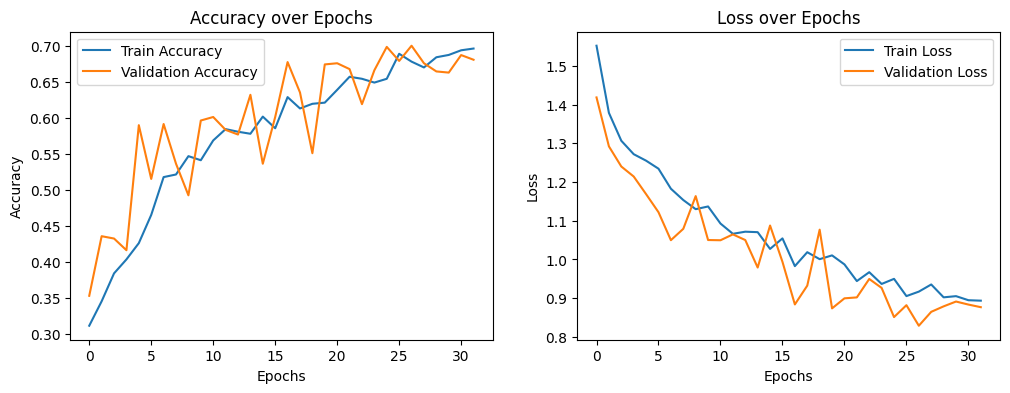

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest',    # Fill pixels after transformation
    validation_split=0.2    # Split for training and validation
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=100, # Increase Epochs in case early stopping isn't needed
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Conclusions
---
### Original Model
The original model seemed to have some over fitting and really hit an asymptotic limit.

### New model with early stopping (patience=5))
  The new model seemed to start out worse but converge toward the same performance.  However the new model training process showed to be more stable and converged consistently.  The epochs stopped at about 30 so I think once Colab allows me to use the TPU computing power again I will remove the early stopping and see if I can get the model to perform even better by running all the way through.

  ### New model without early stopping
  I reused the above code and removed early stopping (No need to make you read it twice). I had to run the code on another account anyway since I was getting throttled on this one. I managed to squeeze out 70 epochs before throttling, and it still seemed like more training would have improved it.  Below is the training loss and accuracy over epochs.
  
  ---
  
  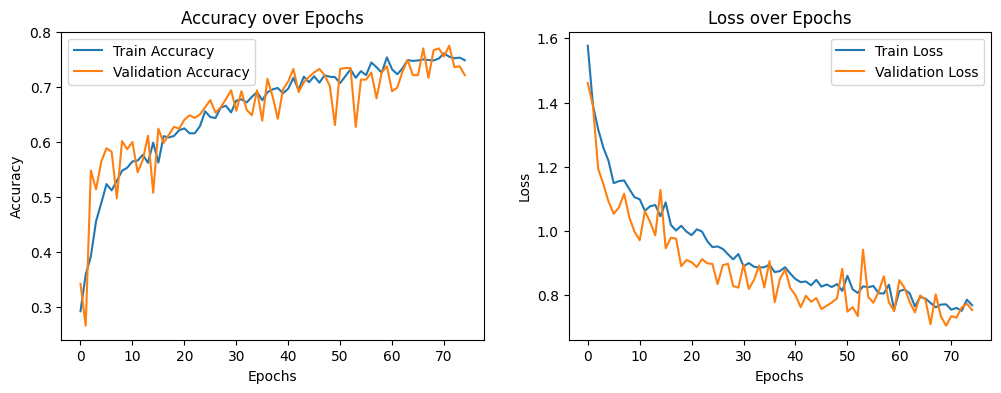